In [2]:
import random
import pandas as pd

In [3]:
# Define items with (weight, value) pairs
items = [(50, 5), (94, 76), (31, 88), (71, 84), (91, 15), (19, 47), (12, 44), (1, 49), 
         (10, 7), (16, 19), (3, 78), (57, 69), (27, 14), (99, 40), (52, 58), 
         (93, 79), (50, 48), (39, 20), (26, 39), (40, 14)]
items = pd.DataFrame(items, columns=['weight', 'value'])
items.index.name = "items"

In [4]:
items.T

items,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
weight,50,94,31,71,91,19,12,1,10,16,3,57,27,99,52,93,50,39,26,40
value,5,76,88,84,15,47,44,49,7,19,78,69,14,40,58,79,48,20,39,14


In [5]:
# Set the total weight limit
totalWeightLimit = 200

In [21]:
# Generate a genome, where each item is included or not
genome = [random.randint(0, 5) == 0 for _ in range(len(items))]
print(len(genome), len(items))
print(genome)

20 20
[False, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False]


In [22]:
def createPopulation(size: int):
    return [[random.randint(0, 5) == 0 for _ in range(len(items))] for _ in range(size)]

In [8]:
def fitness(genes: list):
    totalWeight = 0
    totalValue = 0
    for idx, gene in enumerate(genes):
        if gene:
            totalWeight += items["weight"][idx]
            totalValue += items["value"][idx]

    if totalWeight > totalWeightLimit:
        return 0
    else:
        return totalValue

In [9]:
def selectWinners(population: list):
    populationValues = []
    for genes in population:
        value = fitness(genes=genes)
        if value > 0:
            populationValues.append((value, genes))

    return [genes for value, genes in sorted(populationValues, key=lambda x: x[0], reverse=True)]

In [10]:
def selectBest(winners: list, population: list, percentage=0.2):
    limit = int(percentage * len(population))
    if len(winners) > limit:
        best = winners[:limit]
    else:
        best = winners
    return best

In [11]:
def crossover(genes1: list, genes2: list):
    crossoverPoint = random.randint(1, len(genes1)-1)
    newGenes = genes1[:crossoverPoint] + genes2[crossoverPoint:]
    return newGenes

In [12]:
def mutate(genes: list):
    newGenes = list(genes)
    idx = random.randint(0, len(genes)-1)
    newGenes[idx] = not bool(genes[idx])
    return newGenes

def mutateRandomly(genes: list, probability: int = 100):
    if random.randint(0, probability) == 0:
        return mutate(genes)
    else:
        return list(genes)

In [13]:
def nextGeneration(population: list):
    newPopulation = []
    winners = selectWinners(population)

    if len(winners) > 0:
        winners = selectBest(winners, population, 0.2)
        for _ in range(len(population)):
            newGenes = crossover(random.choice(winners), random.choice(winners))
            newPopulation.append(mutateRandomly(newGenes))
    else:
        newPopulation = createPopulation(len(population))

    return newPopulation

In [14]:
population = createPopulation(1000)
for i in range(20):
    newPopulation = nextGeneration(population)
    population = newPopulation

results = pd.concat([pd.DataFrame(population).mean() * 100, items], axis=1)
results.columns = ["selection_rate"] + list(items.columns)
results.index.name = items.index.name
results.T

items,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
selection_rate,0.1,0.0,100.0,0.1,0.0,100.0,99.9,100.0,0.0,0.0,100.0,100.0,0.2,0.1,0.0,0.0,100.0,0.0,99.9,0.0
weight,50.0,94.0,31.0,71.0,91.0,19.0,12.0,1.0,10.0,16.0,3.0,57.0,27.0,99.0,52.0,93.0,50.0,39.0,26.0,40.0
value,5.0,76.0,88.0,84.0,15.0,47.0,44.0,49.0,7.0,19.0,78.0,69.0,14.0,40.0,58.0,79.0,48.0,20.0,39.0,14.0


<Axes: xlabel='items'>

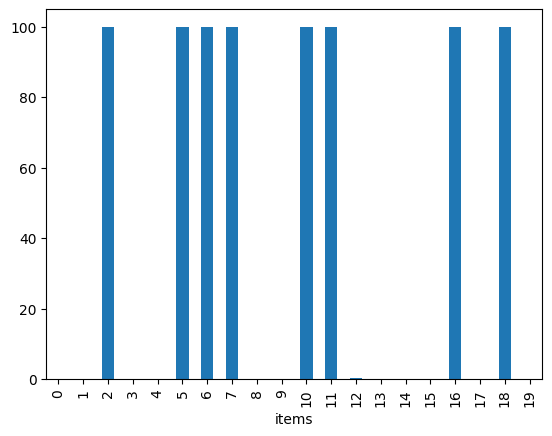

In [15]:
results["selection_rate"].plot.bar()